### 1. Importing Visualization Libraries and Data

In [1]:
### 1. Importing Visualization Libraries and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path
path=r'C:\\\\Users\\\\maad0\\\\OneDrive\\\\CAREERFOUNDRY Notes\\\\Advanced Analytics_Dashboard Design\\\\11-2023 Final Project'

In [3]:
# Import data
df_flavors = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'flavors_checked.csv'))

In [4]:
# Checking head
df_flavors.head()

,Unnamed: 0,reference_number,company_manufacturer,company_location,review_date,bean_origin,bar_name,cocoa_percent,rating,bean_type,rating_metrics
0,0,1876,A. Morin,France,2016,Sao Tome,Agua Grande,0.63,3.75,,Satisfactory
1,1,1676,A. Morin,France,2015,Togo,Kpime,0.70,2.75,,Disappointing
2,2,1676,A. Morin,France,2015,Togo,Atsane,0.70,3.00,,Satisfactory
3,3,1680,A. Morin,France,2015,Togo,Akata,0.70,3.50,,Satisfactory
4,4,1704,A. Morin,France,2015,Peru,Quilla,0.70,3.50,,Satisfactory


In [5]:
df_flavors.shape

(1795, 11)

In [6]:
# Dropping unecessary columns and creating subset,
flavors_sub = df_flavors.drop(['Unnamed: 0', 'company_manufacturer', 'company_location','bean_origin','bar_name','bean_type','rating_metrics'], axis = 1)

In [7]:
# Checking head of numerical columns
flavors_sub.head()

,reference_number,review_date,cocoa_percent,rating
0,1876,2016,0.63,3.75
1,1676,2015,0.70,2.75
2,1676,2015,0.70,3.00
3,1680,2015,0.70,3.50
4,1704,2015,0.70,3.50


### 2. Creating Matrix Heatmap

In [8]:
# Creating correlation table between variables
flavors_sub.corr()

,reference_number,review_date,cocoa_percent,rating
reference_number,1.000000,0.985076,0.037832,0.101030
review_date,0.985076,1.000000,0.038219,0.099846
cocoa_percent,0.037832,0.038219,1.000000,-0.165035
rating,0.101030,0.099846,-0.165035,1.000000


In [9]:
# Rounding values to set decimal places
flavors_sub.corr().round(2)

,reference_number,review_date,cocoa_percent,rating
reference_number,1.00,0.99,0.04,0.10
review_date,0.99,1.00,0.04,0.10
cocoa_percent,0.04,0.04,1.00,-0.17
rating,0.10,0.10,-0.17,1.00


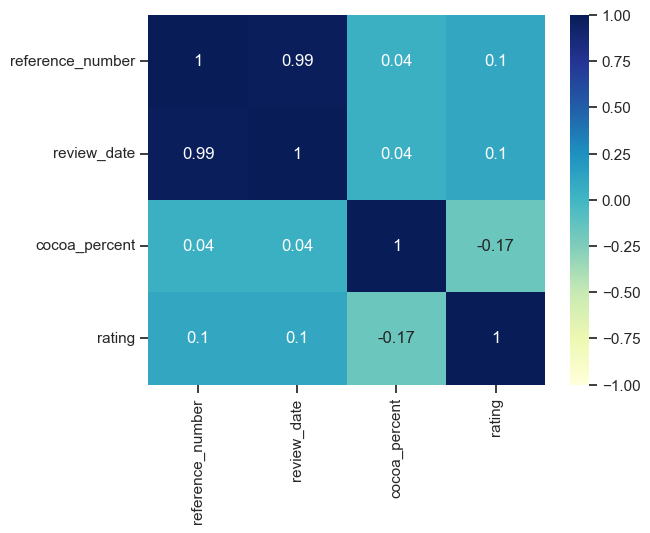

In [38]:
# Creating Matrix Heatmap
heatmap_1 = sns.heatmap(flavors_sub.corr().round(2), annot=True, vmin=-1, vmax=1, center=0, cmap='YlGnBu')

In [39]:
# Export heatmap
heatmap_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'exporing_relationships.png'))

### 03 Relationship between variables

Cocoa percent and the rating variable have a negative correlation. As one variable increases, the other variable tends to decrease. There isn't a strong relationship between these two variables.  However, the reference number and the review date has the strongest correlation, with a coefficent of 0.985076 which indicates a very strong positive correlation- which means as one variable increase, the other variable increases as well- however the reference number does not directly relate to the review date.

### 04 Creating a Scatterplot

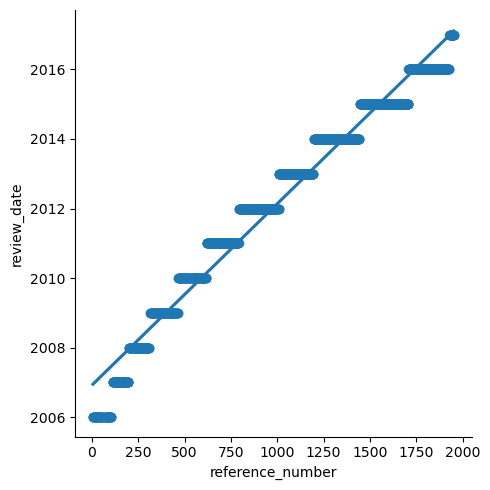

In [11]:
# Scatterplot of most correlated variables
## Reference number and Review Date scatterplot

scatterplot_1 =sns.lmplot(x = 'reference_number', y = 'review_date', data = df_flavors)

In [12]:
# Export scatterplot
scatterplot_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ref_review_date.png'))

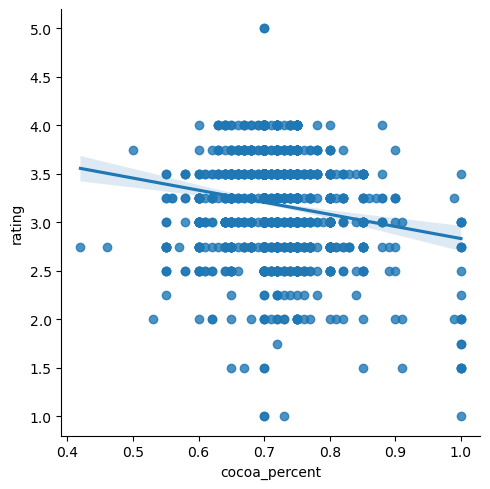

In [13]:
scatterplot_2 =sns.lmplot(x = 'cocoa_percent', y = 'rating', data = df_flavors)

## The above scatterplot shows that a change in cocoa percentage does not affect chocolate bar ratings.

In [14]:
# Export scatterplot 2
scatterplot_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cocoa_percent_rating.png'))

### 05 Creating a Pair Plot

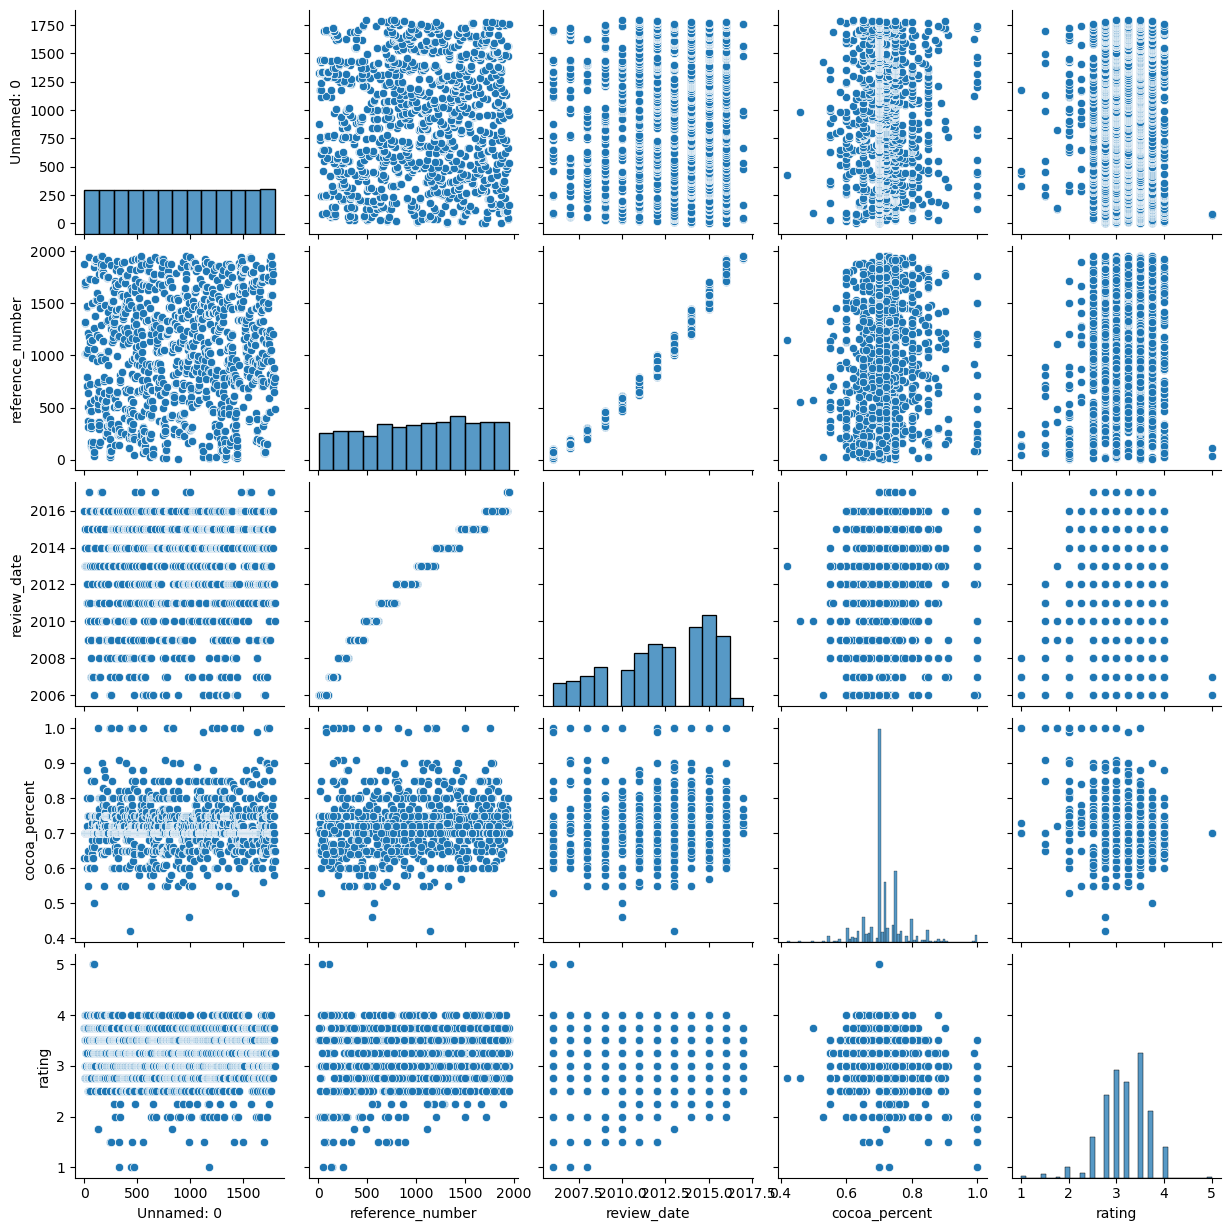

In [15]:
pair_plot = sns.pairplot(df_flavors)

#### My pair plot analysis shows either a weak negative correlation between variables (Cocoa % and Rating) or a weak positive correlation between two variables (Review date/ Rating).  So overall, the pair plot doesn’t show a strong correlation between the variables from the dataset.  It would be nice to see what kind of insights I can derive when I pull in numeric and categorical variables.  I would still like to explore the driving factor of the highest review ratings, i.e., Ratings of 4 and 5 in my exploratory analysis.

### 06 Creating a Categorical Plot

In [16]:
df_flavors.head()

,Unnamed: 0,reference_number,company_manufacturer,company_location,review_date,bean_origin,bar_name,cocoa_percent,rating,bean_type,rating_metrics
0,0,1876,A. Morin,France,2016,Sao Tome,Agua Grande,0.63,3.75,,Satisfactory
1,1,1676,A. Morin,France,2015,Togo,Kpime,0.70,2.75,,Disappointing
2,2,1676,A. Morin,France,2015,Togo,Atsane,0.70,3.00,,Satisfactory
3,3,1680,A. Morin,France,2015,Togo,Akata,0.70,3.50,,Satisfactory
4,4,1704,A. Morin,France,2015,Peru,Quilla,0.70,3.50,,Satisfactory


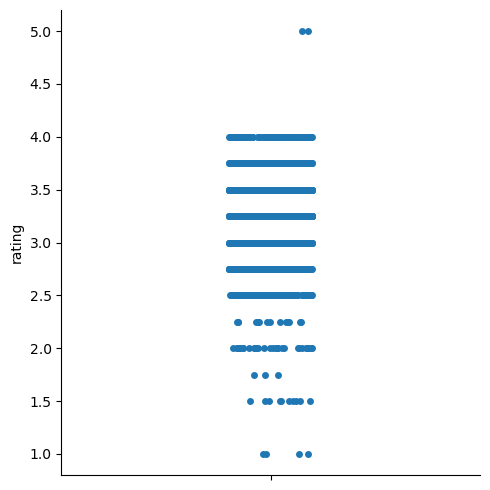

In [17]:
catplot_1 = sns.catplot(y='rating', data=df_flavors);

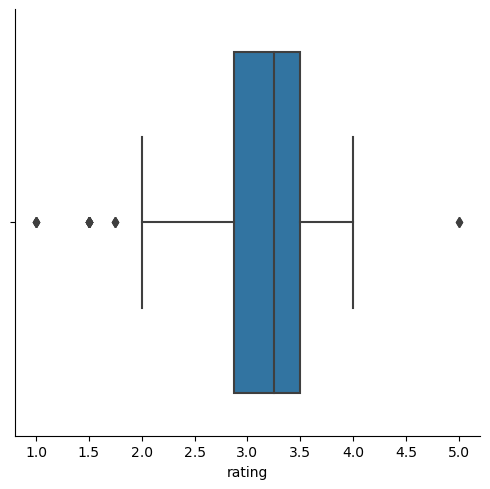

In [18]:
catplot_2 = sns.catplot(x='rating', data=df_flavors, kind = 'box');

In [19]:
# Export catplot 2
catplot_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'rating.png'))

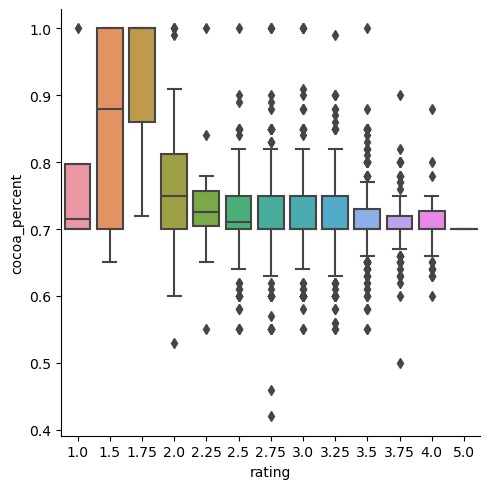

In [20]:
catplot_3 =sns.catplot(x='rating', y='cocoa_percent', data=df_flavors, kind='box');

In [21]:
catplot_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'rating_cocoa_percent.png'))

In [22]:
# Derive new columns cocoa producing regions
def cocoa_producing_regions(row):
    # List of African countries
    africa = ['Sao Tome','Togo','Madagascar','Tanzania','Ghana','Congo','Gabon','Ivory Coast','Uganda','Sao Tome & Principe','Liberia','West Africa','Nigeria','Ghana & Madagascar','Principe']
    # List of Asian countries
    asia = ['Burma','Indonesia','Vietnam','Philippines','Malaysia','Dominican Rep.,Bali','Sri Lanka','India','Malaysia']
    # List of South American Countries
    south_america = ['Bolivia','Brazil','Colombia','Colombia, Ecuador','Ecuador','Peru','Peru,Ecuador','Peru,Ecuador,Venezuela']
    # List of Central America
    central_america = ['Belize','Central and S.America','Costa Rica','El Salvador','Guatemala','Hawaii','Honduras','Mexico','Nicaragua','Panama','Puerto Rico']
    # List of North America
    north_america = ['Canada', 'USA']
    # List of Oceanian countries
    oceania = ['Australia','Fiji','Papua New Guinea','Samoa','Solomon Islands','Vanuatu']
    # List of Dual Countries
    dual_countries = ['Africa,Carribean,C.Am.','Costa Rica, Ven','Dom.Rep., Madagascar','DR,Ecuador, Peru','Ecuador, Costa Rica','Ecuador, Mad., PNG','Ghana, Domin.Rep','Ghana, Panama, Ecuador','Gre., PNG, Haw., Haiti, Mad','Guat., D.R., Peru, Mad., PNG','Indonesia, Ghana','Mad., Java, PNG','Madagascar & Ecuador','Peru(SMartin,Pangoa,nacional)','Peru, Belize','Peru, Dom.Rep','Peru, Mad., Dom.Rep.','Peru, Madagascar','PNG, Vanuatu, Mad','South America, Africa','Trinidad, Ecuador','Ve, Bolivia, D.R.','Ven, Trinidad, Ecuador','Venez,Africa,Brasil,Peru,Mex','Venezuela, Trinidad','Ven., Indonesia, Ecuad.','Venezuela, Dom. Rep.','Venezuela, Java','Venezuela/ Ghana','Venezuela, Ghana','Ven., Trinidad, Mad.','Ven.,Ecu.,Peru,Nic.','Venezuela, Carribean']
    # List of European countries
    europe = ['France', 'Switzerland', 'Italy', 'Belgium', 'Germany', 'Spain', 'England', 'Netherlands', 'Denmark', 'Scotland', 'Wales', 'Ireland', 'Portugal', 'Greece', 'Poland', 'Sweden', 'Finland', 'Norway', 'Russia']
    
    # Check the bean origin value and return the region
    if row['bean_origin'] in africa:
        return 'Africa'
    elif row['bean_origin'] in asia:
        return 'Asia'
    elif row['bean_origin'] in south_america:
        return 'South America'
    elif row['bean_origin'] in central_america:
        return 'Central America'
    elif row['bean_origin'] in north_america:
        return 'North America'
    elif row['bean_origin'] in oceania:
        return 'Oceania'
    elif row['bean_origin'] in dual_countries:
        return 'Dual Countries'
    elif row['bean_origin'] in europe:
        return 'Europe'
    else:
        return 'Unknown'
    


In [23]:
# Apply the function
df_flavors['regions'] = df_flavors.apply(cocoa_producing_regions, axis=1)

In [24]:
df_flavors['regions'].value_counts(dropna = False)

Unknown            590
South America      516
Africa             268
Central America    261
Asia                69
Oceania             66
Dual Countries      25
Name: regions, dtype: int64

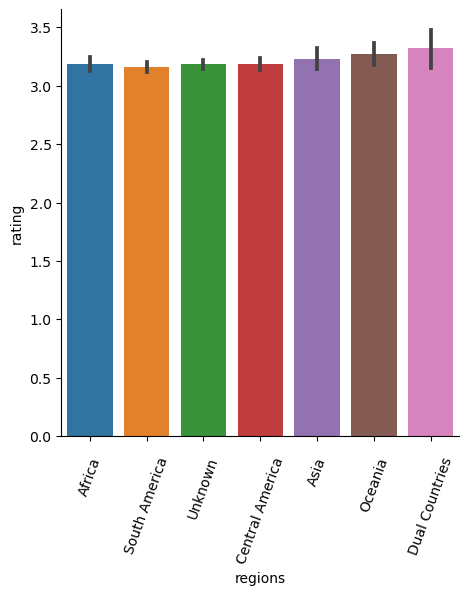

In [25]:
catplot_4 =sns.catplot(x='regions', y='rating', data=df_flavors, kind='bar');
plt.xticks(rotation=70)
plt.tick_params(axis='x', which='major', labelsize=10, pad=10)

In [26]:
catplot_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regions_rating.png'))

In [27]:
# Groupby Regions
df_flavors.groupby(['rating'])['regions'].count()

rating
1.00      4
1.50     10
1.75      3
2.00     32
2.25     14
2.50    127
2.75    259
3.00    341
3.25    303
3.50    392
3.75    210
4.00     98
5.00      2
Name: regions, dtype: int64

In [28]:
# Groupby to find regions that has the minimum cocao percent in chocolate
df_flavors.groupby(['regions']) ['cocoa_percent'].min()

regions
Africa             0.57
Asia               0.60
Central America    0.55
Dual Countries     0.55
Oceania            0.60
South America      0.46
Unknown            0.42
Name: cocoa_percent, dtype: float64

In [29]:
# Groupby to find regions that has the maximum cocao percent in chocolate
df_flavors.groupby(['regions']) ['cocoa_percent'].max()

regions
Africa             1.00
Asia               1.00
Central America    0.90
Dual Countries     0.88
Oceania            1.00
South America      1.00
Unknown            1.00
Name: cocoa_percent, dtype: float64

In [30]:
# Check of the top five ratings per regions
df_flavors.groupby(by='regions')['rating'].nlargest(5)

regions              
Africa           83      4.00
                 232     4.00
                 244     4.00
                 436     4.00
                 689     4.00
Asia             180     4.00
                 1512    4.00
                 32      3.75
                 141     3.75
                 571     3.75
Central America  107     4.00
                 117     4.00
                 315     4.00
                 316     4.00
                 357     4.00
Dual Countries   1288    4.00
                 1528    4.00
                 1536    4.00
                 224     3.75
                 1070    3.75
Oceania          54      4.00
                 311     4.00
                 690     4.00
                 1088    4.00
                 1119    4.00
South America    9       4.00
                 20      4.00
                 56      4.00
                 92      4.00
                 108     4.00
Unknown          78      5.00
                 86      5.00
                 1

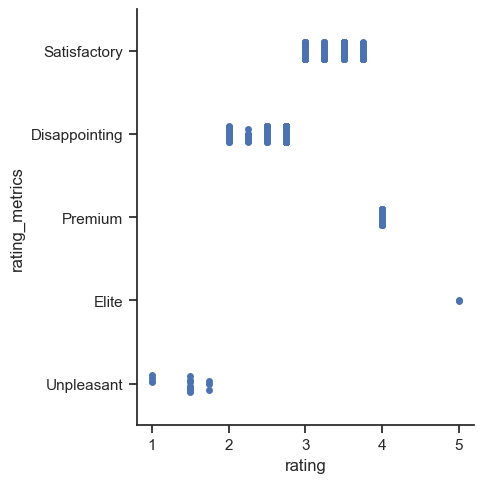

In [31]:
# Review of the Rating metrics
sns.set(style="ticks")
catplot_6 = sns.catplot(x='rating', y='rating_metrics', data=df_flavors)

In [32]:
catplot_6.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'rating_metrics.png'))

In [33]:
df_flavors.groupby(by='rating')['cocoa_percent'].nlargest(5)

rating      
1.00    437     1.00
        1175    0.73
        326     0.70
        465     0.70
1.50    245     1.00
        249     1.00
        449     1.00
        1411    1.00
        324     0.91
1.75    125     1.00
        828     1.00
        132     0.72
2.00    779     1.00
        1251    1.00
        1720    1.00
        1120    0.99
        1658    0.91
2.25    1741    1.00
        1574    0.84
        332     0.78
        1404    0.76
        283     0.75
2.50    835     1.00
        392     0.90
        1064    0.89
        653     0.85
        727     0.85
2.75    834     1.00
        836     1.00
        1204    1.00
        165     0.90
        1736    0.89
3.00    557     1.00
        1319    1.00
        1466    1.00
        1467    1.00
        759     0.91
3.25    1623    0.99
        906     0.90
        1713    0.90
        1786    0.90
        1208    0.88
3.50    330     1.00
        27      0.88
        260     0.85
        448     0.85
        1031    0.85


#### Interpreting the categorical plot results
##### After analyzing the variables in the category plot there is no actual indication that the higher or lower cocoa percentage in a chocolate bar drives the expert ratings and the quality of the bar. 
#### However, it is worth noting that the top five ratings across the regions have a rating scale of ‘4’, representing a rating metric of Premium.  We can infer from this data that the chocolate bars with a premium metric have a superior flavor compared to those with a lower rating.  I also determined that the chocolate bars with a Premium rating have a minimum cocoa percentage of 0.57 and a maximum of 1.  This observation helps to nullify the suggestion that the higher the cocoa percentage, the better rating of the chocolate bars.   


### 07 Revisit question from previous task

In [34]:
# Groupby Regions
df_flavors.groupby(['regions'])['rating'].count()

regions
Africa             268
Asia                69
Central America    261
Dual Countries      25
Oceania             66
South America      516
Unknown            590
Name: rating, dtype: int64

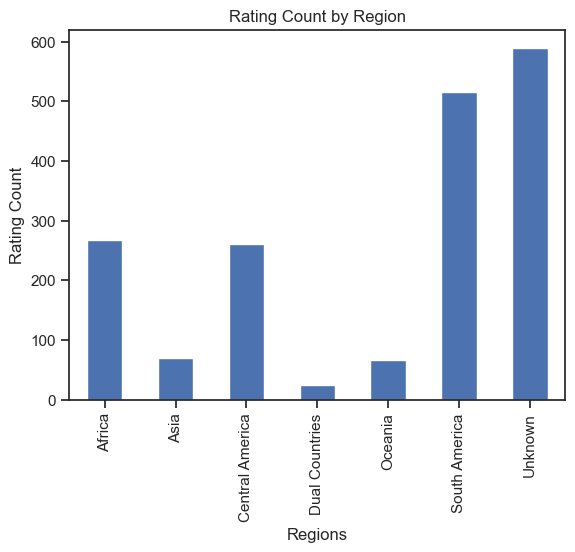

In [46]:
# Groupby Regions
df_flavors.groupby(['regions'])['rating'].count().plot.bar()
plt.xlabel('Regions')
plt.ylabel('Rating Count')
plt.title('Rating Count by Region')
plt.show()

### Answers to questions based on my explorative analysis

### Question 1: What countries produce the highest rated chocolate bars.

   #### Response: If we take out the Unknown regions (special character not defined), countries in South America produce the highest rated chocoalate bars, followed by Central America.

### Question 2: Do chocolate bars with the highest % of cocoa have the highest ratings?

   #### Response: In my exploratory analysis there was no true indication that the % of cocoa in the chocolate bar drives the the expert ratings. As we can see from the catplot visualizations.  The Elite rating metric, rating scale of '5' has a cocoa percentage of 0.70, whereas the Premium rating metric for scale of '4' has a maximum cocoa percentage of about 0.90.
   
   #### There are no additional questions that came to mind at this time.

### 08 Hypothesis
#### 1. The average percentage of cocoa in bars change as years go by.
#### 2. 50 % percent or more raters will give chocolate bars a rating higher than 2.5.
#### 3. Companies in the U.S.A is in the top 10 companies that manufactures top rated chocolate bars.

In [35]:
# Export Data
df_flavors.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_flavors_metrics_regions.csv'))